In [122]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
path = "F:/Workspace/Project_Python/data_sales/"
Frame = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = os.path.join(path,file)
        df = pd.read_csv(filepath)
        Frame.append(df)
        result = pd.concat(Frame)
df = result

In [123]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [124]:
df['Month'] = df['Order Date'].str[0:2] # cắt chuỗi trong 1 cột
df
print(set(df['Month']))

{'05', '09', '11', '02', nan, '04', '08', 'Or', '10', '03', '12', '06', '01', '07'}


In [125]:

df = df.dropna(how='all') # loại bỏ nan
df = df[df['Month'] != 'Or']

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [126]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
#di chuyển cột
move_column = df.pop('Sales')
df.insert(4,'Sales',move_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [127]:

#Doanh thu tháng sale cao nhất

df.groupby('Month')['Sales'].sum()


Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [128]:
sales_value = df.groupby('Month')['Sales'].sum()
sales_value.max()

4613443.5

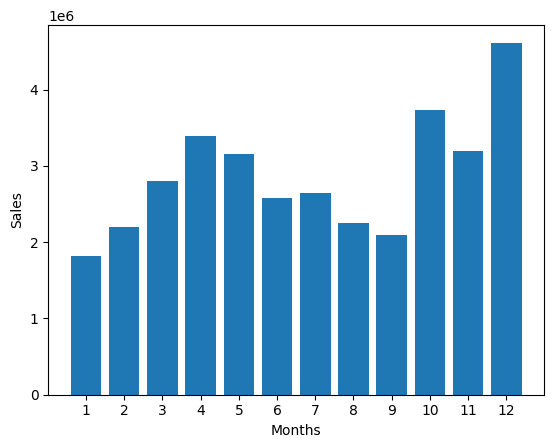

In [129]:

months = range(1,13)
plt.bar(x = months,height = sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()


In [130]:
#What the best city sale
address_to_city= lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [131]:
df.groupby('City')['Sales'].sum()

City
Atlanta          2795498.50
Austin           1819581.75
Boston           3661642.00
Dallas           2767975.50
Los Angeles      5452571.00
New York City    4664317.50
Portland         2320490.50
San Francisco    8262204.00
Seattle          2747755.50
Name: Sales, dtype: float32

In [132]:
sale_value_City = df.groupby('City')['Sales'].sum()
sale_value_City.max()

8262204.0

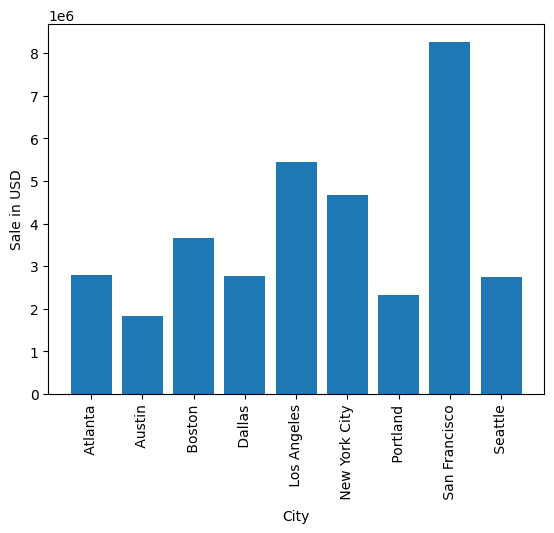

In [133]:

cities = [city for city, sales in sale_value_City.items()]
plt.bar(x = cities,height=sale_value_City)
plt.xticks(cities,rotation =90)
plt.xlabel('City')
plt.ylabel('Sale in USD')
plt.show()

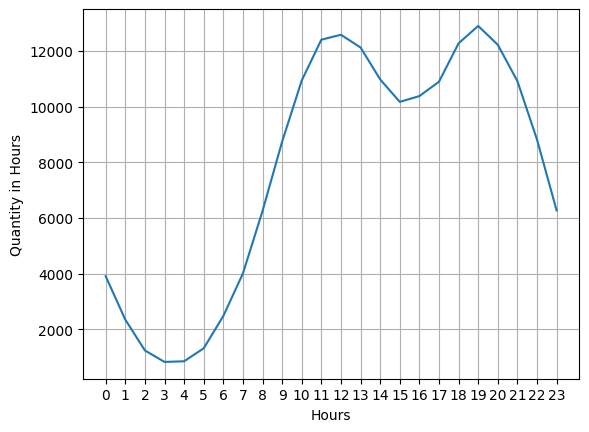

In [134]:
#Khung giờ có doanh thu cao nhất
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%y %H:%M')
df['Hours'] = df['Order Date'].dt.hour
Max_value_hour = df.groupby('Hours').count()['Sales']
hours = [hour for hour,sale in Max_value_hour.items()]
plt.plot(hours,Max_value_hour)
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Quantity in Hours')
plt.show()

In [135]:
# Tất cả Sp có số lượng bán nhiều nhất đến thấp nhất
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product:', '.join(product)
df_dup = df_dup.copy()
df_dup['All Products']=df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

All Products
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64

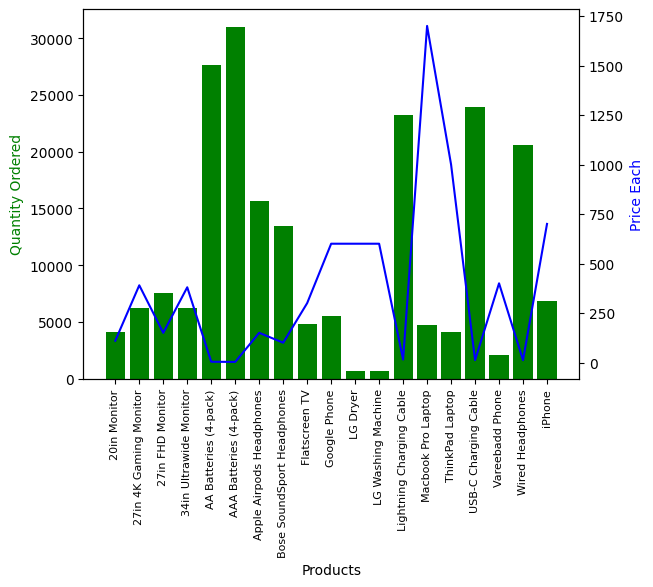

In [136]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df = df.dropna(subset=['Price Each'])
prices = df.groupby('Product')['Price Each'].mean()
prices
all_products = df.groupby('Product')['Quantity Ordered'].sum()
products_ls = [product for product, quant in all_products.items()]
#------------------------------------------------------------------------------------------------
#code trộm
x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticks(range(len(products_ls)))
ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')
#------------------------------------------------------------------------------------------------
plt.show()
